# Start notebook

In [99]:
# load libraries
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
import statsmodels.api as sm
import researchpy as rp
import statsFuncs.mean_confidence_interval as mci
import plotFuncs.prettypyplot as plotFuncs
import scipy
from scipy import stats as stats
from scipy import stats as cp
import os
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import seaborn as sns
import glob as glob
from natsort import natsorted
sns.set(color_codes=True)

# stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp
import scikit_posthocs as sp

# magic functions
%load_ext autoreload
%autoreload 2
%matplotlib inline

# create dummy class for struct-like dataframes


class structtype():
    pass


matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)
matplotlib.rcParams.update({'axes.labelsize': 16.0})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [100]:
# is it new data?
is_new = 1

# Paths 

In [101]:
analysispath = os.getcwd()
mainpath = analysispath + '/../'
designpath = mainpath + '/design'
resultspath = mainpath + '/results'
stimpath = mainpath + '/stim'
practicestimpath = mainpath + '/practice'
results_csv = mainpath + '/results_csv'
analysispath = mainpath + '/analysis'
design_csv = mainpath + '/design_csv'

# Load data 

In [102]:
# change path to datapath
os.chdir(resultspath)

# find all data available
filestoload = glob.glob('*_perifovmooney_ecc.mat') 
filestoload = natsorted(filestoload) # order them by subject number

os.chdir(analysispath)
# how many subjects? == length of filestoload
nfiles = len(filestoload)

# loading = glob.glob(filetoload)

nTrials = 1300
index = range(nTrials*nfiles) # length of file wih all data

data_headline = ['SUBID', 'TRIAL', 'MOONEYID', 'MOONEYCATEGORY', 'LOC',
                 'COND', 'MOONEY_NAME', 'MOONEY_GENDER', 'ECCENTRICITY', 'RESPONSE', 'ACCURACY', 'RT']
sub = 0 # start subject count
row_start  = 0
if is_new == 1:
    for ii in range(nfiles):
        sub = sub + 1
        subINIT = filestoload[ii][:filestoload[ii].index('_')]
#         if subINIT != 'TCB':
        print('Subject initials: ', subINIT)

        row_start = nTrials * ii
        completename = resultspath + '/' + filestoload[ii]  # name of file with path

      # load the mat
        mat = loadmat(completename)  # load mat-file
        data_raw = mat['results']  # select the data inside the mat struct

      # note that the mat file doesn't have a header, so we need to create it
        nTrials_results = len(data_raw)  # 1200
        if nTrials != nTrials_results:
            print('Warning! Trials missing in results file, check before moving on.')
        # create data frame with the header and the raw data
        subdata = pd.DataFrame(data_raw, columns=data_headline)

        # add column with subject initials
        subdata.loc[:, 'SUBINIT'] = subINIT

      # save individual data frame for future use:
        file_to_save = results_csv + '/' + subINIT + '_perifovmooney_ecc.csv'
        subdata.to_csv(file_to_save)

        # assign to all subjects matrix
        if ii == 0:
            allsubjects = subdata
        else:
            allsubjects = allsubjects.append(subdata)
    allsubjects.reset_index(drop=True, inplace=True)


Subject initials:  AG
Subject initials:  AW
Subject initials:  CC
Subject initials:  CN
Subject initials:  CP
Subject initials:  CR
Subject initials:  CW
Subject initials:  DD
Subject initials:  DG
Subject initials:  EW
Subject initials:  GHA
Subject initials:  GK
Subject initials:  JC
Subject initials:  JO
Subject initials:  JX
Subject initials:  LM
Subject initials:  MI
Subject initials:  MP
Subject initials:  MY
Subject initials:  ND
Subject initials:  NJ
Subject initials:  SC
Subject initials:  SH
Subject initials:  TCB
Warning! Trials missing in results file, check before moving on.
Subject initials:  TM
Subject initials:  YM


 load designs:

In [103]:
# change path to datapath
os.chdir(designpath)

# find all data available
filestoload = glob.glob('*_designmat.mat') 
filestoload = natsorted(filestoload) # order them by subject number

os.chdir(analysispath)
# how many subjects? == length of filestoload
nfiles = len(filestoload)

# loading = glob.glob(filetoload)

nTrials = 1300
index = range(nTrials*nfiles) # length of file wih all data

data_headline = ['SUBID', 'TRIAL', 'MOONEYID', 'MOONEYCATEGORY', 'LOC',
                 'COND', 'MOONEY_NAME', 'MOONEY_GENDER', 'ECCENTRICITY']
sub = 0 # start subject count
row_start  = 0
if is_new == 1:
    for ii in range(nfiles):
        sub = sub + 1
        subINIT = filestoload[ii][:filestoload[ii].index('_')]
#         if subINIT != 'TCB':
        print('Subject initials: ', subINIT)

        row_start = nTrials * ii
        completename = designpath + '/' + filestoload[ii]  # name of file with path

      # load the mat
        mat = loadmat(completename)  # load mat-file
        data_raw = mat['subdesign']  # select the data inside the mat struct

      # note that the mat file doesn't have a header, so we need to create it
        nTrials_results = len(data_raw)  # 1200
        if nTrials != nTrials_results:
            print('Warning! Trials missing in results file, check before moving on.')
        # create data frame with the header and the raw data
        subdata_design = pd.DataFrame(data_raw, columns=data_headline)

        # add column with subject initials
        subdata_design.loc[:, 'SUBINIT'] = subINIT

      # save individual data frame for future use:
        file_to_save = design_csv + '/' + subINIT + '_design_perifovmooney_ecc.csv'
        subdata_design.to_csv(file_to_save)

        # assign to all subjects matrix
        if ii == 0:
            allsubjects_design = subdata_design
        else:
            allsubjects_design = allsubjects_design.append(subdata_design)
    allsubjects_design.reset_index(drop=True, inplace=True)


Subject initials:  AG
Subject initials:  AG
Subject initials:  AW
Subject initials:  CC
Subject initials:  CN
Subject initials:  CP
Subject initials:  CR
Subject initials:  CW
Subject initials:  DD
Subject initials:  DG
Subject initials:  EW
Subject initials:  GHA
Subject initials:  JC
Subject initials:  JO
Subject initials:  JX
Subject initials:  LM
Subject initials:  MI
Subject initials:  MY
Subject initials:  ND
Subject initials:  NJ
Subject initials:  SC
Subject initials:  SH
Subject initials:  YM


## Fix issues 

Remove my data:

In [104]:
teredata = allsubjects[allsubjects['SUBINIT'] == 'TCB']
allsubjects = allsubjects[allsubjects['SUBINIT'] != 'TCB']
allsubjects.reset_index(inplace=True, drop=True)
backup = allsubjects 

five subjects are missing the eccentricity data, in column 8. We are pulling it from the design

In [105]:
os.chdir(designpath)
subjects_missing = ['EW', 'CC', 'CR', 'MI', 'MY', 'JO', 'CP']

for subject in subjects_missing:
    print('Subject initials: ', subject)
    subdata = allsubjects[allsubjects['SUBINIT'] == subject]
    subdata_design = allsubjects_design[allsubjects_design['SUBINIT'] == subject] # get the data for that subject
    idx_data = allsubjects['SUBINIT'] == subject
    allsubjects.loc[idx_data, 'ECCENTRICITY'] = np.array(subdata_design['ECCENTRICITY'])

os.chdir(resultspath)

Subject initials:  EW
Subject initials:  CC
Subject initials:  CR
Subject initials:  MI
Subject initials:  MY
Subject initials:  JO
Subject initials:  CP


Fix that formatting is wrong:

In [106]:
int_headline = ['SUBID', 'TRIAL', 'MOONEYID', 'ECCENTRICITY', 'ACCURACY']
str_headline = ['MOONEYCATEGORY', 'LOC', 'COND', 'MOONEY_NAME', 'MOONEY_GENDER', 'RESPONSE']
for columns_int in int_headline:    
    allsubjects[columns_int] = allsubjects[columns_int].astype('int')
    
for columns_str in str_headline:    
    allsubjects[columns_str] = allsubjects[columns_str].str[0]

    
allsubjects['RT'] = allsubjects['RT'].astype('float64')

In [107]:
# for row in range(allsubjects.shape[0]):
#     for column in range(allsubjects.shape[1]-1):
#         print('row: ' + str(row) + '; column: ' + str(column))

#         allsubjects.iloc[row, column] = allsubjects.iloc[row, column][0]
#         if isinstance(allsubjects.iloc[row, column], (np.ndarray)):
#             allsubjects.iloc[row, column] = allsubjects.iloc[row, column][0]
            
            
# for datapoint in range(len(allsubjects)):
#     allsubjects.loc[datapoint, 'ACCURACY'] = np.float64(allsubjects.loc[datapoint, 'ACCURACY'])
#     allsubjects.loc[datapoint, 'COND'] = str(allsubjects.loc[datapoint, 'COND'])
    
    
# allsubjects['ACCURACY'] = pd.to_numeric(allsubjects['ACCURACY'])
# allsubjects['RT'] = pd.to_numeric(allsubjects['RT'])

In [108]:
for row in range(allsubjects.shape[0]):
    if allsubjects.loc[row, 'LOC'] == 'fovea':
        allsubjects.loc[row, 'ECC_PLOT'] = 0
    elif allsubjects.loc[row, 'LOC'] == 'left':
        if allsubjects.loc[row, 'ECCENTRICITY'] == 2:
            allsubjects.loc[row, 'ECC_PLOT'] = -1
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 4:
            allsubjects.loc[row, 'ECC_PLOT'] = -2            
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 6:
            allsubjects.loc[row, 'ECC_PLOT'] = -3
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 8:
            allsubjects.loc[row, 'ECC_PLOT'] = -4
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 10:
            allsubjects.loc[row, 'ECC_PLOT'] = -5
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 12:
            allsubjects.loc[row, 'ECC_PLOT'] = -6
    elif allsubjects.loc[row, 'LOC'] == 'right':
        if allsubjects.loc[row, 'ECCENTRICITY'] == 2:
            allsubjects.loc[row, 'ECC_PLOT'] = 1
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 4:
            allsubjects.loc[row, 'ECC_PLOT'] = 2            
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 6:
            allsubjects.loc[row, 'ECC_PLOT'] = 3
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 8:
            allsubjects.loc[row, 'ECC_PLOT'] = 4
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 10:
            allsubjects.loc[row, 'ECC_PLOT'] = 5
        elif allsubjects.loc[row, 'ECCENTRICITY'] == 12:
            allsubjects.loc[row, 'ECC_PLOT'] = 6

In [109]:
teredata.reset_index(inplace=True, drop=True)
for row in range(teredata.shape[0]):
    if teredata.loc[row, 'LOC'] == 'fovea':
        teredata.loc[row, 'ECC_PLOT'] = 0
    elif teredata.loc[row, 'LOC'] == 'left':
        if teredata.loc[row, 'ECCENTRICITY'] == 2:
            teredata.loc[row, 'ECC_PLOT'] = -1
        elif teredata.loc[row, 'ECCENTRICITY'] == 4:
            teredata.loc[row, 'ECC_PLOT'] = -2            
        elif teredata.loc[row, 'ECCENTRICITY'] == 6:
            teredata.loc[row, 'ECC_PLOT'] = -3
        elif teredata.loc[row, 'ECCENTRICITY'] == 8:
            teredata.loc[row, 'ECC_PLOT'] = -4
        elif teredata.loc[row, 'ECCENTRICITY'] == 10:
            teredata.loc[row, 'ECC_PLOT'] = -5
        elif teredata.loc[row, 'ECCENTRICITY'] == 12:
            teredata.loc[row, 'ECC_PLOT'] = -6
    elif teredata.loc[row, 'LOC'] == 'right':
        if teredata.loc[row, 'ECCENTRICITY'] == 2:
            teredata.loc[row, 'ECC_PLOT'] = 1
        elif teredata.loc[row, 'ECCENTRICITY'] == 4:
            teredata.loc[row, 'ECC_PLOT'] = 2            
        elif teredata.loc[row, 'ECCENTRICITY'] == 6:
            teredata.loc[row, 'ECC_PLOT'] = 3
        elif teredata.loc[row, 'ECCENTRICITY'] == 8:
            teredata.loc[row, 'ECC_PLOT'] = 4
        elif teredata.loc[row, 'ECCENTRICITY'] == 10:
            teredata.loc[row, 'ECC_PLOT'] = 5
        elif teredata.loc[row, 'ECCENTRICITY'] == 12:
            teredata.loc[row, 'ECC_PLOT'] = 6

In [110]:
for row in range(teredata.shape[0]):
    for column in range(teredata.shape[1]-1):
        teredata.iloc[row, column] = teredata.iloc[row, column][0]
        if isinstance(teredata.iloc[row, column], (np.ndarray)):
            teredata.iloc[row, column] = teredata.iloc[row, column][0]
            
            
for datapoint in range(len(teredata)):
    teredata.loc[datapoint, 'ACCURACY'] = np.float64(teredata.loc[datapoint, 'ACCURACY'])
    teredata.loc[datapoint, 'COND'] = str(teredata.loc[datapoint, 'COND'])
    
    
teredata['ACCURACY'] = pd.to_numeric(teredata['ACCURACY'])
teredata['RT'] = pd.to_numeric(teredata['RT'])

In [111]:
allsubjects['ECC_PLOT_ABS'] = abs(allsubjects['ECC_PLOT'])

## Save data or load it 

In [112]:
if is_new == 1:
# save data frame with all subjects data
    allsubjects.to_csv('allsubjects_perifovmooney_ecc.csv')
elif is_new == 0:
    allsubjects = pd.read_csv('allsubjects_perifovmooney_ecc_post.csv', index_col=0)
    


# Group analysis

## Outliers 

Text(0.5, 1.0, 'Upright - ACCURACY')

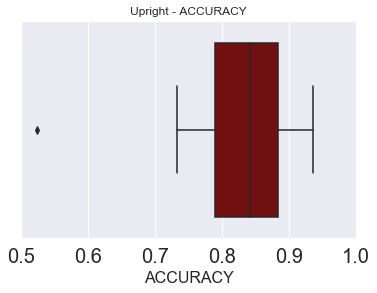

In [113]:
upright_data_acc = allsubjects[allsubjects['COND'] == 'upright'].groupby(['SUBINIT']).mean()['ACCURACY']
sns.boxplot(upright_data_acc, color='maroon')
plt.xlim(0.5, 1)
plt.title('Upright - ACCURACY')


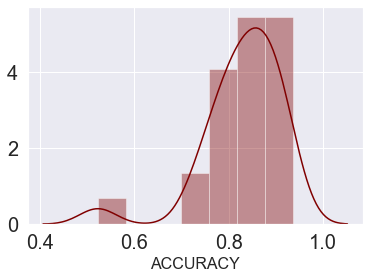

In [114]:
sns.distplot(upright_data_acc, color='maroon')

Text(0.5, 1.0, 'Inverted - ACCURACY')

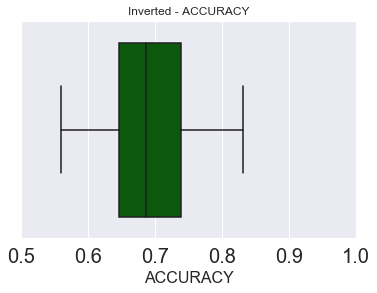

In [115]:
inverted_data_acc = allsubjects[allsubjects['COND'] == 'inverted'].groupby(['SUBINIT']).mean()['ACCURACY']
sns.boxplot(inverted_data_acc, color='darkgreen')
plt.xlim(0.5, 1)
plt.title('Inverted - ACCURACY')

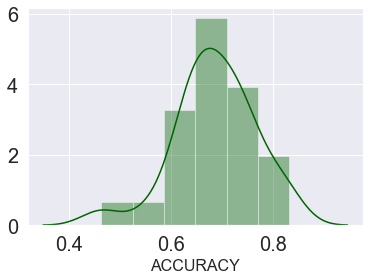

In [116]:
sns.distplot(inverted_data_acc, color='darkgreen')

Text(0.5, 1.0, 'Upright - RT')

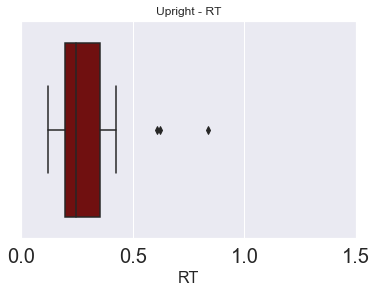

In [117]:
upright_data_rt = allsubjects[allsubjects['COND'] == 'upright'].groupby(['SUBINIT']).mean()['RT']
sns.boxplot(upright_data_rt, color='maroon')
plt.xlim(0, 1.5)
plt.title('Upright - RT')

Text(0.5, 1.0, 'Inverted - RT')

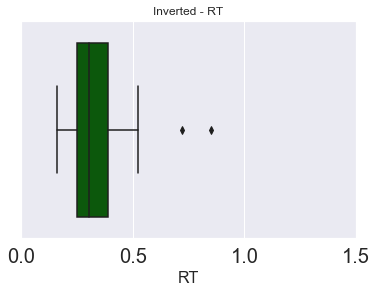

In [118]:
inverted_data_rt = allsubjects[allsubjects['COND'] == 'inverted'].groupby(['SUBINIT']).mean()['RT']
sns.boxplot(inverted_data_rt, color='darkgreen')
plt.xlim(0, 1.5)
plt.title('Inverted - RT')

### remove outliers 

In [119]:
allsubjects = allsubjects[allsubjects['SUBINIT'] != 'AG']
allsubjects.reset_index(inplace=True, drop=True)
backup = allsubjects 

## Summary analysis 

In [120]:
allsubjects.describe()

,SUBID,TRIAL,MOONEYID,ECCENTRICITY,ACCURACY,RT,ECC_PLOT,ECC_PLOT_ABS
count,31200.000000,31200.000000,31200.000000,31200.000000,31200.000000,31200.000000,31200.000000,31200.000000
mean,10.166667,650.500000,10.497308,6.461538,0.768558,0.304110,0.000000,3.230769
std,6.580801,375.283578,5.789251,3.774782,0.421761,1.295342,3.741717,1.887391
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000096,-6.000000,0.000000
25%,4.000000,325.750000,5.000000,4.000000,1.000000,0.016423,-3.000000,2.000000
50%,9.500000,650.500000,10.000000,6.000000,1.000000,0.141413,0.000000,3.000000
75%,15.250000,975.250000,16.000000,10.000000,1.000000,0.308857,3.000000,5.000000
max,22.000000,1300.000000,20.000000,12.000000,1.000000,189.432155,6.000000,6.000000


In [121]:
allsubjects.groupby(['COND']).mean()['ACCURACY']

COND
inverted    0.694808
upright     0.842308
Name: ACCURACY, dtype: float64

In [122]:
allsubjects.groupby(['LOC']).mean()['ACCURACY']

LOC
fovea    0.820417
left     0.767847
right    0.760625
Name: ACCURACY, dtype: float64

In [123]:
allsubjects.groupby(['LOC', 'COND']).mean()['ACCURACY']

LOC    COND    
fovea  inverted    0.740833
       upright     0.900000
left   inverted    0.689583
       upright     0.846111
right  inverted    0.692361
       upright     0.828889
Name: ACCURACY, dtype: float64

In [124]:
allsubjects.groupby(['LOC', 'ECCENTRICITY', 'COND']).mean()['ACCURACY']

LOC    ECCENTRICITY  COND    
fovea  0             inverted    0.740833
                     upright     0.900000
left   2             inverted    0.736667
                     upright     0.893333
       4             inverted    0.690833
                     upright     0.866667
       6             inverted    0.690000
                     upright     0.856667
       8             inverted    0.688333
                     upright     0.838333
       10            inverted    0.655833
                     upright     0.811667
       12            inverted    0.675833
                     upright     0.810000
right  2             inverted    0.725000
                     upright     0.876667
       4             inverted    0.722500
                     upright     0.848333
       6             inverted    0.688333
                     upright     0.840000
       8             inverted    0.700000
                     upright     0.827500
       10            inverted    0.675833
    

In [125]:
palette ={"high holistic":"blue","low holistic":"green"}

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


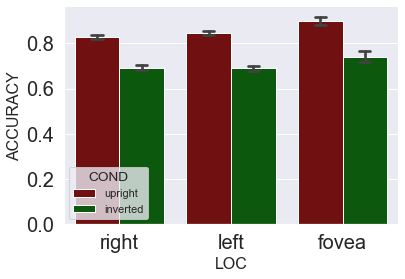

In [126]:
ax = sns.barplot(x='LOC', y='ACCURACY', hue='COND',
            data=allsubjects, palette=['maroon', 'darkgreen'], capsize=.1, ci=95)
plotFuncs.beautiPlot(sns)
# save plot
os.chdir(analysispath)
plt.savefig('LocLabelACC.eps', bbox_inches = 'tight')
plt.show()

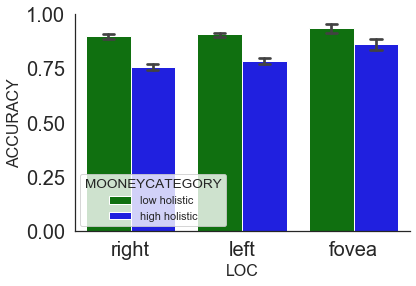

In [127]:
palette ={"high holistic":"blue","low holistic":"green"}
ax = sns.barplot(x='LOC', y='ACCURACY', hue='MOONEYCATEGORY',
            data=allsubjects[allsubjects['COND'] == 'upright'], palette=palette, capsize=.1, ci=95)
plotFuncs.beautiPlot(sns)

In [128]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
model = ols('ACCURACY ~ C(COND)*C(LOC)', allsubjects).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 5, 31194) =  206.581, p =  0.0000


In [129]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ACCURACY   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     206.6
Date:                Wed, 12 Aug 2020   Prob (F-statistic):          1.85e-217
Time:                        11:35:43   Log-Likelihood:                -16827.
No. Observations:               31200   AIC:                         3.367e+04
Df Residuals:                   31194   BIC:                         3.372e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.7408      0.012     61.842      0.000       0.717       0.764
C(COND)[T.upright]                     0.1592      0.017      9.395      0.000       0.126       0.192
C(LOC)[T.left]                        -0.0513      0.013     -3.961      0.000      -0.077      -0.026
C(LOC)[T.right]                       -0.0485      0.013     -3.746      0.000      -0.074      -0.023
C(COND)[T.upright]:C(LOC)[T.left]     -0.0026      0.018     -0.144      0.885      -0.039       0.033
C(COND)[T.upright]:C(LOC)[T.right]    -0.0226      0.018     -1.237      0.216      -0.059       0.013
==============================================================================
Omnibus:                     5115.045   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7757.586
Skew:                          -1.208   Prob(JB):                         0.00
Kurtosis:                       2.638   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [130]:
res = sm.stats.anova_lm(model, typ=2)
res

,sum_sq,df,F,PR(>F)
C(COND),169.698750,1.0,985.424620,5.489547e-213
C(LOC),7.367874,2.0,21.392274,5.197791e-10
C(COND):C(LOC),0.808472,2.0,2.347361,9.563807e-02
Residual,5371.880000,31194.0,NaN,NaN


In [131]:
t_periphery, p_periphery = stats.ttest_ind(
    allsubjects[(allsubjects['LOC'] == 'right') & (allsubjects['COND'] == 'upright')]['ACCURACY'],
    allsubjects[(allsubjects['LOC'] == 'right') & (allsubjects['COND'] == 'inverted')]['ACCURACY'])
print("t = " + str(t_periphery))
print("p = " + str(p_periphery))

t = 19.446765170588794
p = 3.6100320379822484e-83


In [132]:
t_periphery, p_periphery = stats.ttest_ind(
    allsubjects[(allsubjects['LOC'] == 'left') & (allsubjects['COND'] == 'upright')]['ACCURACY'],
    allsubjects[(allsubjects['LOC'] == 'fovea') & (allsubjects['COND'] == 'upright')]['ACCURACY'])
print("t = " + str(t_periphery))
print("p = " + str(p_periphery))

t = -4.898286915082648
p = 9.848182819216002e-07


In [135]:
t_periphery, p_periphery = stats.ttest_ind(
    allsubjects[(allsubjects['LOC'] == 'left') & (allsubjects['COND'] == 'upright')]['ACCURACY'],
    allsubjects[(allsubjects['LOC'] == 'right') & (allsubjects['COND'] == 'upright')]['ACCURACY'])
print("t = " + str(t_periphery))
print("p = " + str(p_periphery))

t = 2.8016219605279864
p = 0.005091427843842793


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

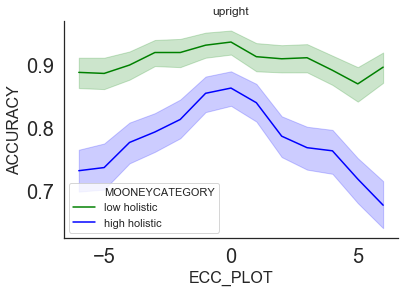

In [136]:
ax = sns.lineplot(x='ECC_PLOT', y='ACCURACY', hue='MOONEYCATEGORY', data=allsubjects[allsubjects['COND']=='upright'],
            palette=palette, ci=95)
plotFuncs.beautiPlot(sns)
plt.title('upright')
# plt.xticks(range(8), xlabels)
# save plot
os.chdir(analysispath)
plt.savefig('highvslowACC.eps', bbox_inches = 'tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

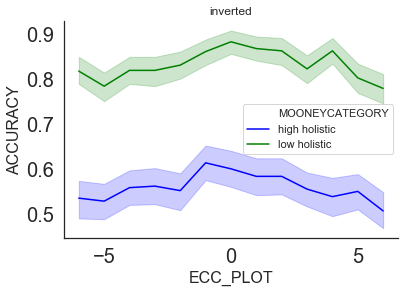

In [137]:
ax = sns.lineplot(x='ECC_PLOT', y='ACCURACY', hue='MOONEYCATEGORY', data=allsubjects[allsubjects['COND']=='inverted'],
            palette=palette, ci=95)
plotFuncs.beautiPlot(sns)
plt.title('inverted')
# plt.xticks(range(8), xlabels)
# save plot
os.chdir(analysispath)
plt.savefig('highvslowACC.eps', bbox_inches = 'tight')
plt.show()

In [138]:
numLocs = 13
for i in range(numLocs):
    
    t, p = stats.ttest_ind(
        allsubjects['ACCURACY'][(allsubjects['COND'] == 'upright') & (allsubjects['LOC'] == i+1)],
        allsubjects['ACCURACY'][(allsubjects['COND'] == 'inverted') & (allsubjects['LOC'] == i+1)])
    if p<0.05:
        print('T test upright-inverted for location ' + str(i+1) + ' is significant ' + ", t = " + str(t) + ", p = " + str(p) )
#     print("t = " + str(t))
#     print("p = " + str(p))

## Means per location 

In [139]:
numLocs = 13
numCategories = 2

accPerLocs = pd.DataFrame()
rtPerLocs = pd.DataFrame()
locations = np.unique(allsubjects['ECC_PLOT'])
subjects = np.unique(allsubjects['SUBINIT'])
row = 0

for sub in subjects:
    
    subdata = allsubjects[allsubjects['SUBINIT'] == sub]
    
    for locs in locations:
        
        for category in range(numCategories):

            if category == 0:
                index_category = 'high holistic'
            elif category == 1:
                index_category = 'low holistic'

            # index the datapoints from each locations
            indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                          & (subdata['COND'] == 'upright')
                                          & (subdata['MOONEYCATEGORY'] == index_category)]
            indexed_inverted = subdata[(
                subdata['ECC_PLOT'] == locs) & (subdata['COND'] == 'inverted')
                & (subdata['MOONEYCATEGORY'] == index_category)]

            m_upright, lower_upright, upper_upright = mci.mean_confidence_interval(
                indexed_upright.loc[:, 'ACCURACY'])
            m_inverted, lower_inverted, upper_inverted = mci.mean_confidence_interval(
                indexed_inverted.loc[:, 'ACCURACY'])

            accPerLocs.loc[row, 'SUBINIT'] = sub            
            accPerLocs.loc[row, 'ECC_PLOT'] = locs
            accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
            accPerLocs.loc[row, 'MEAN_UPRIGHT'] = m_upright
            accPerLocs.loc[row, 'CI_LOWER_UPRIGHT'] = lower_upright
            accPerLocs.loc[row, 'CI_UPPER_UPRIGHT'] = upper_upright

            accPerLocs.loc[row, 'MEAN_INVERTED'] = m_inverted
            accPerLocs.loc[row, 'CI_LOWER_INVERTED'] = lower_inverted
            accPerLocs.loc[row, 'CI_UPPER_INVERTED'] = upper_inverted

            accPerLocs.loc[row, 'HOLISTIC'] = accPerLocs.loc[row,
                                                              'MEAN_UPRIGHT'] - accPerLocs.loc[row, 'MEAN_INVERTED']
            row = row + 1

In [140]:
numLocs = 13
numCategories = 2
numConditions = 3

accPerLocs = pd.DataFrame()
rtPerLocs = pd.DataFrame()
locations = np.unique(allsubjects['ECC_PLOT'])
subjects = np.unique(allsubjects['SUBINIT'])
conditions = ['upright', 'inverted', 'holistic']
row = 0

for sub in subjects:
    subdata = allsubjects[allsubjects['SUBINIT'] == sub]
    subid = np.unique(subdata['SUBID'])
    for locs in locations:
        for category in range(numCategories):

            if category == 0:
                index_category = 'high holistic'
            elif category == 1:
                index_category = 'low holistic'
            
            for condition in conditions:
                if condition == 'upright':
                    indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'upright')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]

                    m_upright, lower_upright, upper_upright = mci.mean_confidence_interval(
                        indexed_upright.loc[:, 'ACCURACY'])

                    accPerLocs.loc[row, 'SUBINIT'] = sub
                    accPerLocs.loc[row, 'SUBID'] = subid
                    accPerLocs.loc[row, 'CONDITION'] = condition
                    accPerLocs.loc[row, 'ECC_PLOT'] = locs
                    accPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    accPerLocs.loc[row, 'LOC'] = indexed_upright.LOC.unique()                  
                    accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    accPerLocs.loc[row, 'MEAN'] = m_upright
                    accPerLocs.loc[row, 'CI_LOWER'] = lower_upright
                    accPerLocs.loc[row, 'CI_UPPER'] = upper_upright
                
                elif condition == 'inverted':
                    
                    indexed_inverted = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'inverted')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]
                        
                    m_inverted, lower_inverted, upper_inverted = mci.mean_confidence_interval(
                        indexed_inverted.loc[:, 'ACCURACY'])

                    accPerLocs.loc[row, 'SUBINIT'] = sub
                    accPerLocs.loc[row, 'SUBID'] = subid
                    accPerLocs.loc[row, 'CONDITION'] = condition
                    accPerLocs.loc[row, 'ECC_PLOT'] = locs
                    accPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    accPerLocs.loc[row, 'LOC'] = indexed_inverted.LOC.unique()                  

                    accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    accPerLocs.loc[row, 'MEAN'] = m_inverted
                    accPerLocs.loc[row, 'CI_LOWER'] = lower_inverted
                    accPerLocs.loc[row, 'CI_UPPER'] = upper_inverted
                
                elif condition == 'holistic':
                        # index the datapoints from each locations
                    indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'upright')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]
                    indexed_inverted = subdata[(
                        subdata['ECC_PLOT'] == locs) & (subdata['COND'] == 'inverted')
                        & (subdata['MOONEYCATEGORY'] == index_category)]

                    m_upright, lower_upright, upper_upright = mci.mean_confidence_interval(
                        indexed_upright.loc[:, 'ACCURACY'])
                    m_inverted, lower_inverted, upper_inverted = mci.mean_confidence_interval(
                        indexed_inverted.loc[:, 'ACCURACY'])
                    
                    accPerLocs.loc[row, 'SUBINIT'] = sub 
                    accPerLocs.loc[row, 'SUBID'] = subid
                    accPerLocs.loc[row, 'CONDITION'] = condition
                    accPerLocs.loc[row, 'LOC'] = indexed_upright.LOC.unique()                  
                    accPerLocs.loc[row, 'ECC_PLOT'] = locs
                    accPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    accPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    accPerLocs.loc[row, 'MEAN'] = m_upright - m_inverted
                row = row + 1

units="subject" for lineplot

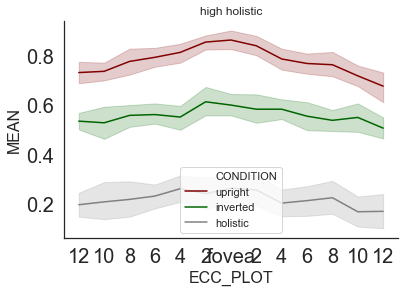

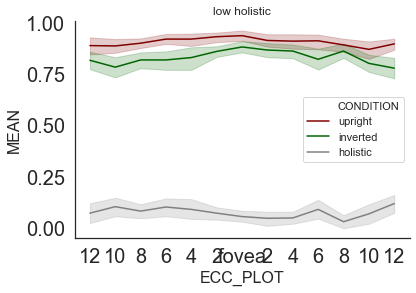

In [141]:
categories = ['high holistic', 'low holistic']
xlabels = ['12', '10', '8', '6', '4', '2', 'fovea', '2', '4', '6', '8', '10', '12']
for category in categories:
    palette ={"upright":"maroon","inverted":"darkgreen", "holistic": 'grey'}
    ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='CONDITION', data=accPerLocs[accPerLocs['MOONEYCATEGORY'] == category],
                palette=palette, ci=95)
    plotFuncs.beautiPlot(sns)
    plt.xticks(range(-6, 7), xlabels)

    plt.title(category)

    plt.show()

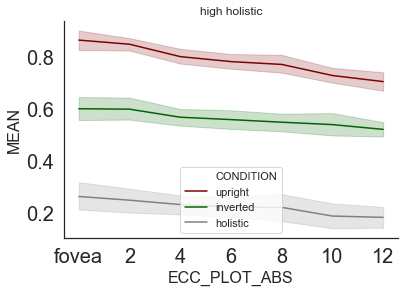

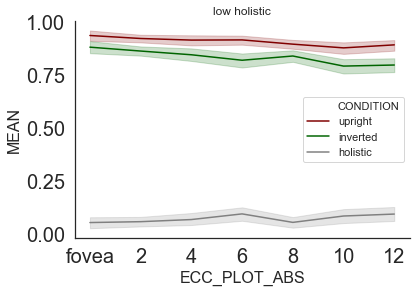

In [142]:
categories = ['high holistic', 'low holistic']
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
for category in categories:
    palette ={"upright":"maroon","inverted":"darkgreen", "holistic": 'grey'}
    ax= sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', hue='CONDITION', data=accPerLocs[accPerLocs['MOONEYCATEGORY'] == category],
                palette=palette, ci=95)
    plotFuncs.beautiPlot(sns)
    plt.xticks(range(0, 7), xlabels_abs)

    plt.title(category)

    plt.show()

Text(0.5, 1.0, 'holistic')

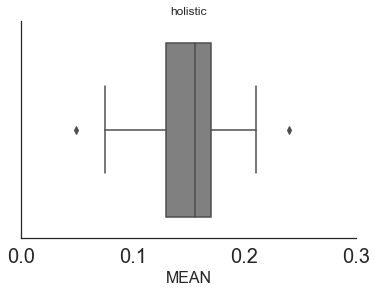

In [143]:
holistic = accPerLocs[accPerLocs['CONDITION'] == 'holistic']
holistic_plot = accPerLocs[accPerLocs['CONDITION'] == 'holistic'].groupby(['SUBINIT']).mean()['MEAN']
sns.boxplot(holistic_plot, color='gray')
plt.xlim(0, 0.3)
plt.title('holistic')

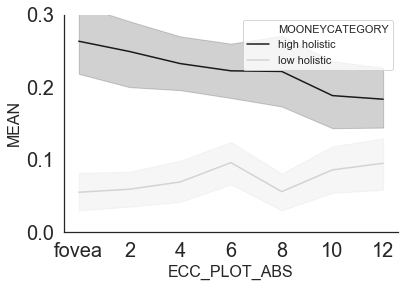

In [144]:
categories = ['high holistic', 'low holistic']
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', hue='MOONEYCATEGORY', data=holistic,
            palette=['k', 'lightgray'], ci=95)
plotFuncs.beautiPlot(sns)
plt.xticks(range(0, 7), xlabels_abs)
plt.ylim(0, 0.30)


plt.show()

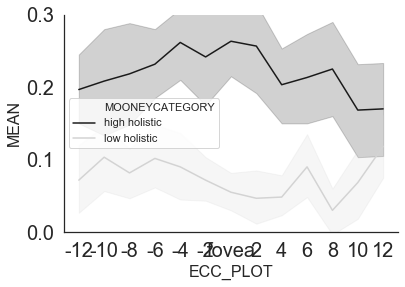

In [145]:
categories = ['high holistic', 'low holistic']
xlabels_abs = ['-12', '-10', '-8', '-6', '-4', '-2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='MOONEYCATEGORY', data=holistic,
            palette=['k', 'lightgray'], ci=95)
plotFuncs.beautiPlot(sns)
plt.xticks(range(-6, 7), xlabels_abs)
plt.ylim(0, 0.3)

plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


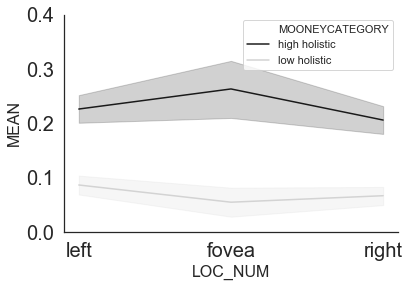

In [146]:
xlabels_abs = ['left', 'fovea', 'right']
holistic.loc[holistic['LOC'] == 'left', 'LOC_NUM'] = '0'
holistic.loc[holistic['LOC'] == 'fovea', 'LOC_NUM'] = '1'
holistic.loc[holistic['LOC'] == 'right', 'LOC_NUM'] = '2'

categories = ['high holistic', 'low holistic']
# xlabels_abs = ['left', 'fovea', 'right']
ax = sns.lineplot(x='LOC_NUM', y='MEAN', hue='MOONEYCATEGORY', data=holistic,
            palette=['k', 'lightgray'], ci=95)
plotFuncs.beautiPlot(sns)
plt.xticks(range(3), xlabels_abs)
plt.ylim(0, 0.4)

plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

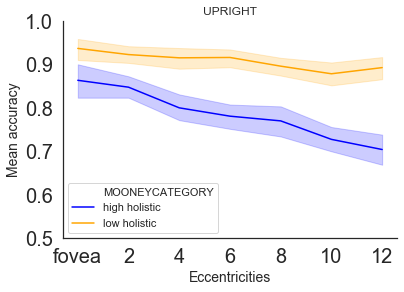

In [147]:
palette ={"high holistic":"blue","low holistic":"orange"}
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']

ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', hue='MOONEYCATEGORY', data=accPerLocs[accPerLocs['CONDITION'] == 'upright'],
             palette=palette, ci=95)
plotFuncs.beautiPlot(sns)
plt.title('UPRIGHT')
plt.xticks(range(0, 7), xlabels_abs)
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('Eccentricities', fontsize=14)
plt.ylim([0.5, 1])
# save plot
os.chdir(analysispath)
plt.savefig('highvslowACC.eps', bbox_inches = 'tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

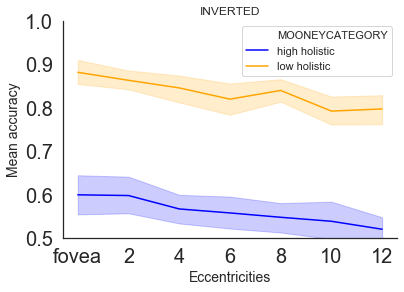

In [148]:
palette ={"high holistic":"blue","low holistic":"orange"}
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']

ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', hue='MOONEYCATEGORY', data=accPerLocs[accPerLocs['CONDITION'] == 'inverted'],
             palette=palette, ci=95)
plotFuncs.beautiPlot(sns)
plt.title('INVERTED')
plt.xticks(range(0, 7), xlabels_abs)
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('Eccentricities', fontsize=14)
plt.ylim([0.5, 1])
# save plot
os.chdir(analysispath)
plt.savefig('highvslowACC.eps', bbox_inches = 'tight')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript back

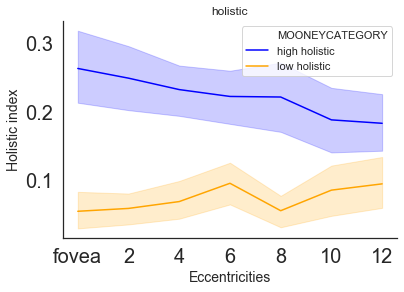

In [149]:
palette ={"high holistic":"blue","low holistic":"orange"}
xlabels_abs = ['fovea', '2', '4', '6', '8', '10', '12']

ax = sns.lineplot(x='ECC_PLOT_ABS', y='MEAN', hue='MOONEYCATEGORY', data=accPerLocs[accPerLocs['CONDITION'] == 'holistic'],
             palette=palette, ci=95)
plotFuncs.beautiPlot(sns)
plt.title('holistic')
plt.xticks(range(0, 7), xlabels_abs)
plt.ylabel('Holistic index', fontsize=14)
plt.xlabel('Eccentricities', fontsize=14)
# plt.ylim([0.5, 1])
# save plot
os.chdir(analysispath)
plt.savefig('highvslowHolistic.eps', bbox_inches = 'tight')
plt.show()

## Replicate crowding results 

In [150]:
crowding = accPerLocs[(accPerLocs['ECC_PLOT_ABS'] == 5) | (accPerLocs['ECC_PLOT_ABS'] == 0)]
crowding_inverted = crowding[crowding['CONDITION'] == 'inverted']
crowding = crowding[crowding['CONDITION'] == 'upright']


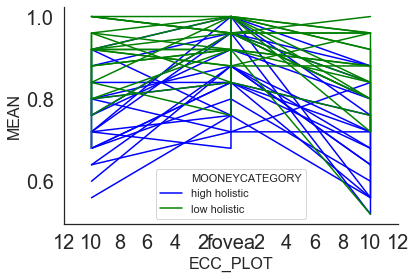

In [151]:
palette ={"high holistic":"blue","low holistic":"green"}
xlabels = ['12', '10', '8', '6', '4', '2', 'fovea', '2', '4', '6', '8', '10', '12']

ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='MOONEYCATEGORY', data=crowding, palette=palette, ci=95,
             markers=True, estimator=None, units='SUBID')
plt.xticks(range(-6, 7), xlabels)

plotFuncs.beautiPlot(sns)

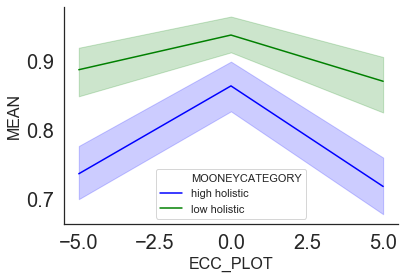

In [152]:
palette ={"high holistic":"blue","low holistic":"green"}
xlabels = ['12', '10', '8', '6', '4', '2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='MOONEYCATEGORY', data=crowding, palette=palette, ci=95,
             markers=True)
plotFuncs.beautiPlot(sns)

Text(0.5, 1.0, 'Inverted faces')

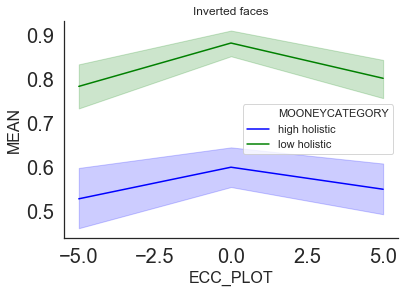

In [153]:
palette ={"high holistic":"blue","low holistic":"green"}
xlabels = ['12', '10', '8', '6', '4', '2', 'fovea', '2', '4', '6', '8', '10', '12']
ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='MOONEYCATEGORY', data=crowding_inverted, palette=palette, ci=95,
             markers=True)
plotFuncs.beautiPlot(sns)
plt.title('Inverted faces')

## reaction time

In [154]:
numLocs = 13
numCategories = 2
numConditions = 3

rtPerLocs = pd.DataFrame()
rtPerLocs = pd.DataFrame()
locations = np.unique(allsubjects['ECC_PLOT'])
subjects = np.unique(allsubjects['SUBINIT'])
conditions = ['upright', 'inverted', 'holistic']
row = 0

for sub in subjects:
    subdata = allsubjects[allsubjects['SUBINIT'] == sub]
    subdata = subdata[subdata['ACCURACY'] == 1]
    subid = np.unique(subdata['SUBID'])
    for locs in locations:
        for category in range(numCategories):

            if category == 0:
                index_category = 'high holistic'
            elif category == 1:
                index_category = 'low holistic'
            
            for condition in conditions:
                if condition == 'upright':
                    indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'upright')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]

                    m_upright, lower_upright, upper_upright = mci.mean_confidence_interval(
                        indexed_upright.loc[:, 'RT'])

                    rtPerLocs.loc[row, 'SUBINIT'] = sub
                    rtPerLocs.loc[row, 'SUBID'] = subid
                    rtPerLocs.loc[row, 'CONDITION'] = condition
                    rtPerLocs.loc[row, 'ECC_PLOT'] = locs
                    rtPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    rtPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    rtPerLocs.loc[row, 'MEAN'] = m_upright
                    rtPerLocs.loc[row, 'CI_LOWER'] = lower_upright
                    rtPerLocs.loc[row, 'CI_UPPER'] = upper_upright
                
                elif condition == 'inverted':
                    
                    indexed_inverted = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'inverted')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]
                        
                    m_inverted, lower_inverted, upper_inverted = mci.mean_confidence_interval(
                        indexed_inverted.loc[:, 'RT'])

                    rtPerLocs.loc[row, 'SUBINIT'] = sub
                    rtPerLocs.loc[row, 'SUBID'] = subid
                    rtPerLocs.loc[row, 'CONDITION'] = condition
                    rtPerLocs.loc[row, 'ECC_PLOT'] = locs
                    rtPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    rtPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    rtPerLocs.loc[row, 'MEAN'] = m_inverted
                    rtPerLocs.loc[row, 'CI_LOWER'] = lower_inverted
                    rtPerLocs.loc[row, 'CI_UPPER'] = upper_inverted
                
                elif condition == 'holistic':
                        # index the datapoints from each locations
                    indexed_upright = subdata[(subdata['ECC_PLOT'] == locs)
                                                  & (subdata['COND'] == 'upright')
                                                  & (subdata['MOONEYCATEGORY'] == index_category)]
                    indexed_inverted = subdata[(
                        subdata['ECC_PLOT'] == locs) & (subdata['COND'] == 'inverted')
                        & (subdata['MOONEYCATEGORY'] == index_category)]

                    m_upright, lower_upright, upper_upright = mci.mean_confidence_interval(
                        indexed_upright.loc[:, 'RT'])
                    m_inverted, lower_inverted, upper_inverted = mci.mean_confidence_interval(
                        indexed_inverted.loc[:, 'RT'])
                    
                    rtPerLocs.loc[row, 'SUBINIT'] = sub 
                    rtPerLocs.loc[row, 'SUBID'] = subid
                    rtPerLocs.loc[row, 'CONDITION'] = condition
                    rtPerLocs.loc[row, 'ECC_PLOT'] = locs
                    rtPerLocs.loc[row, 'ECC_PLOT_ABS'] = abs(locs)
                    rtPerLocs.loc[row, 'MOONEYCATEGORY'] = index_category
                    rtPerLocs.loc[row, 'MEAN'] = m_upright - m_inverted
                row = row + 1

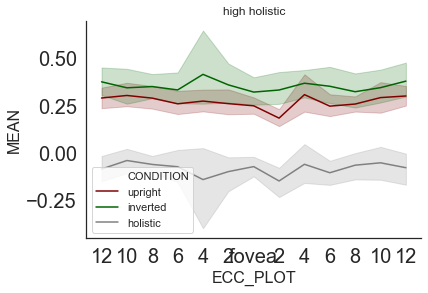

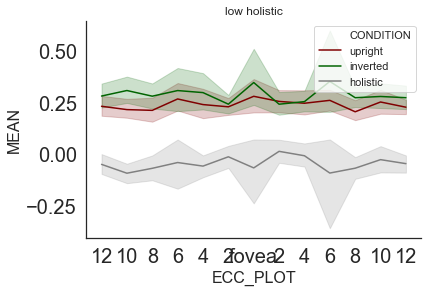

In [155]:
categories = ['high holistic', 'low holistic']
xlabels = ['12', '10', '8', '6', '4', '2', 'fovea', '2', '4', '6', '8', '10', '12']
for category in categories:
    palette ={"upright":"maroon","inverted":"darkgreen", "holistic": 'grey'}
    ax = sns.lineplot(x='ECC_PLOT', y='MEAN', hue='CONDITION', data=rtPerLocs[rtPerLocs['MOONEYCATEGORY'] == category],
                palette=palette, ci=95)
    plotFuncs.beautiPlot(sns)
    plt.xticks(range(-6, 7), xlabels)

    plt.title(category)

    plt.show()

### Plot Mooney category

### Stats Mooney category

In [156]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
uprightdata = allsubjects[allsubjects['COND'] == 'upright']
model = ols('ACCURACY ~ C(LOC)*C(MOONEYCATEGORY)', uprightdata).fit()

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

Overall model F( 5, 15594) =  108.510, p =  0.0000


In [157]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ACCURACY   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     108.5
Date:                Wed, 12 Aug 2020   Prob (F-statistic):          4.98e-113
Time:                        11:37:02   Log-Likelihood:                -6122.7
No. Observations:               15600   AIC:                         1.226e+04
Df Residuals:                   15594   BIC:                         1.230e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
Intercept                                             0.8633      0.015     59.014      0.000       0.835       0.892
C(LOC)[T.left]                                       -0.0789      0.016     -4.993      0.000      -0.110      -0.048
C(LOC)[T.right]                                      -0.1044      0.016     -6.610      0.000      -0.135      -0.073
C(MOONEYCATEGORY)[T.low holistic]                     0.0733      0.021      3.545      0.000       0.033       0.114
C(LOC)[T.left]:C(MOONEYCATEGORY)[T.low holistic]      0.0500      0.022      2.237      0.025       0.006       0.094
C(LOC)[T.right]:C(MOONEYCATEGORY)[T.low holistic]     0.0667      0.022      2.983      0.003       0.023       0.110
==============================================================================
Omnibus:                     4498.515   Durbin-Watson:                   1.894
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9542.607
Skew:                          -1.780   Prob(JB):                         0.00
Kurtosis:                       4.419   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [158]:
res = sm.stats.anova_lm(model, typ=2)
res

,sum_sq,df,F,PR(>F)
C(LOC),5.394701,2.0,21.005941,7.753587e-10
C(MOONEYCATEGORY),63.081026,1.0,491.251072,3.420557e-107
C(LOC):C(MOONEYCATEGORY),1.192308,2.0,4.642620,9.645748e-03
Residual,2002.408889,15594.0,NaN,NaN


In [159]:
t, p = stats.ttest_ind(
    uprightdata['ACCURACY'][(uprightdata['LOC'] == 'right') & (uprightdata['MOONEYCATEGORY'] == 'low holistic')],
    uprightdata['ACCURACY'][(uprightdata['LOC'] == 'left') & (uprightdata['MOONEYCATEGORY'] == 'low holistic')])

print("t = " + str(t))
print("p = " + str(p))

t = -1.2761747267172343
p = 0.20193493613147048


In [160]:
print('Upright: ')
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
uprightdata = allsubjects[allsubjects['COND'] == 'upright']
model = ols('ACCURACY ~ C(MOONEYCATEGORY)*C(ECC_PLOT_ABS)', uprightdata).fit()
res = sm.stats.anova_lm(model, typ=2)
# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")
print(model.summary())
print(res)

Upright: 
Overall model F( 13, 15586) =  51.838, p =  0.0000
                            OLS Regression Results                            
Dep. Variable:               ACCURACY   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.041
Method:                 Least Squares   F-statistic:                     51.84
Date:                Wed, 12 Aug 2020   Prob (F-statistic):          1.23e-132
Time:                        11:37:03   Log-Likelihood:                -6059.3
No. Observations:               15600   AIC:                         1.215e+04
Df Residuals:                   15586   BIC:                         1.225e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
------------------------

In [161]:
# Fits the model with the interaction term
# This will also automatically include the main effects for each factor
inverteddata = allsubjects[allsubjects['COND'] == 'inverted']
model = ols('ACCURACY ~ C(ECC_PLOT_ABS)*C(MOONEYCATEGORY)', inverteddata).fit()
res = sm.stats.anova_lm(model, typ=2)

# Seeing if the overall model is significant
print(f"Overall model F({model.df_model: .0f},{model.df_resid: .0f}) = {model.fvalue: .3f}, p = {model.f_pvalue: .4f}")

print(model.summary())
print(res)

Overall model F( 13, 15586) =  119.622, p =  0.0000
                            OLS Regression Results                            
Dep. Variable:               ACCURACY   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     119.6
Date:                Wed, 12 Aug 2020   Prob (F-statistic):          2.17e-309
Time:                        11:37:03   Log-Likelihood:                -9296.3
No. Observations:               15600   AIC:                         1.862e+04
Df Residuals:                   15586   BIC:                         1.873e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [162]:
locations = np.unique(uprightdata['ECC_PLOT'])
for locs in locations:
    t, p = stats.ttest_ind(
        allsubjects['ACCURACY'][(allsubjects['ECC_PLOT'] == locs) & (allsubjects['MOONEYCATEGORY'] == 'low holistic')],
        allsubjects['ACCURACY'][(allsubjects['ECC_PLOT'] == locs) & (allsubjects['MOONEYCATEGORY'] == 'high holistic')])
    
    print('High vs low for location ' + str(locs))
    print("t = " + str(t))
    print("p = " + str(p))
    if p < 0.06:
        print('IS SIGNIFICANT')
    else:
        print('is NOT significant')

High vs low for location -6.0
t = 12.684204095041968
p = 9.898042579704477e-36
IS SIGNIFICANT
High vs low for location -5.0
t = 11.524057433102652
p = 6.039703746701374e-30
IS SIGNIFICANT
High vs low for location -4.0
t = 11.333007469624738
p = 4.864723242912614e-29
IS SIGNIFICANT
High vs low for location -3.0
t = 11.514630667111186
p = 6.699378892214893e-30
IS SIGNIFICANT
High vs low for location -2.0
t = 11.673087369561712
p = 1.1614397783876104e-30
IS SIGNIFICANT
High vs low for location -1.0
t = 10.422472480972003
p = 6.607586754337119e-25
IS SIGNIFICANT
High vs low for location 0.0
t = 11.637867787372986
p = 1.717671494495378e-30
IS SIGNIFICANT
High vs low for location 1.0
t = 11.21633935897451
p = 1.7130396830255668e-28
IS SIGNIFICANT
High vs low for location 2.0
t = 12.35318752538426
p = 4.95954279193001e-34
IS SIGNIFICANT
High vs low for location 3.0
t = 12.184145973319776
p = 3.53578869879784e-33
IS SIGNIFICANT
High vs low for location 4.0
t = 13.503132889212182
p = 4.21343412

In [163]:
t, p = stats.ttest_ind(
    allsubjects['ACCURACY'][(allsubjects['COND'] == 'upright') & (allsubjects['LOC'] == 'fovea') & (allsubjects['MOONEYCATEGORY'] == 'high holistic')],
    allsubjects['ACCURACY'][(allsubjects['COND'] == 'inverted') & (allsubjects['LOC'] == 'fovea') & (allsubjects['MOONEYCATEGORY'] == 'high holistic')])

print("t = " + str(t))
print("p = " + str(p))

t = 10.771705570387818
p = 6.872606942517837e-26


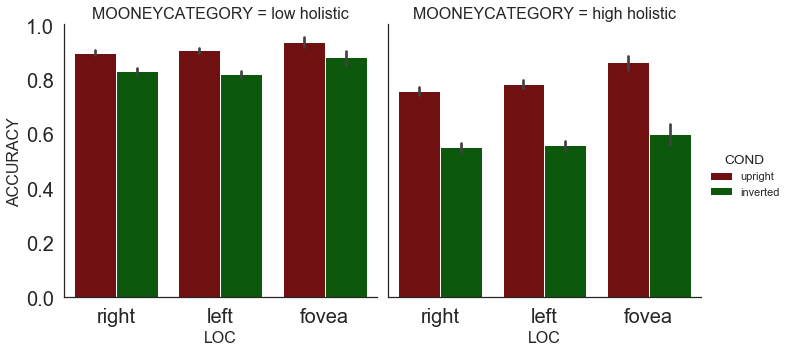

In [164]:
sns.catplot(x='LOC', y='ACCURACY', hue='COND', col='MOONEYCATEGORY', 
            kind='bar', palette=['maroon', 'darkgreen'], ci=95, data=allsubjects)
# save plot
os.chdir(analysispath)
plt.savefig('MooneyCategoryvsLocACC.eps', bbox_inches = 'tight')
plt.show()

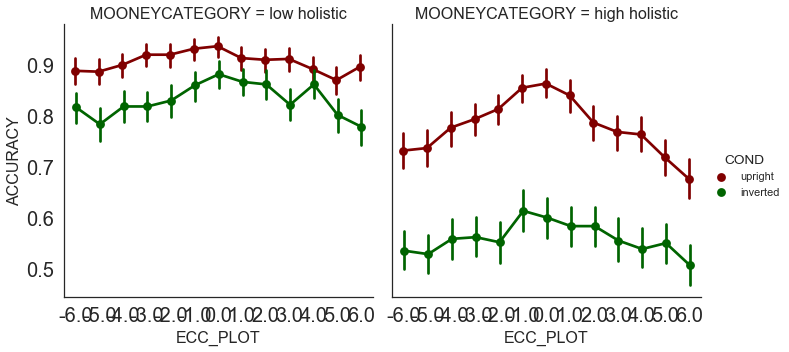

In [165]:
sns.catplot(x='ECC_PLOT', y='ACCURACY', hue='COND',
            col='MOONEYCATEGORY', data=allsubjects,
            kind='point', dodge=True, palette=['maroon', 'darkgreen'])
# plt.xticks(range(7), xlabels)
# # save plot
# os.chdir(analysispath)
# plt.savefig('MooneyCategoryvsLocLabelACClines.eps', bbox_inches = 'tight')
# plt.show()

In [166]:
print('High holistic faces: ')
for i in range(numLocs):
   
    t, p = stats.ttest_ind(
        allsubjects['ACCURACY'][(allsubjects['COND'] == 'upright') & (allsubjects['LOC'] == i+1) & (allsubjects['MOONEYCATEGORY'] == 'high holistic')],
        allsubjects['ACCURACY'][(allsubjects['COND'] == 'inverted') & (allsubjects['LOC'] == i+1) & (allsubjects['MOONEYCATEGORY'] == 'high holistic')])
    if p<0.05:
        print('T test upright-inverted for location ' + str(i+1) + ' is significant ' + ", t = " + str(t) + ", p = " + str(p) )

print('Low holistic faces: ')
for i in range(numLocs):
    t, p = stats.ttest_ind(
        allsubjects['ACCURACY'][(allsubjects['COND'] == 'upright') & (allsubjects['LOC'] == i+1) & (allsubjects['MOONEYCATEGORY'] == 'low holistic')],
        allsubjects['ACCURACY'][(allsubjects['COND'] == 'inverted') & (allsubjects['LOC'] == i+1) & (allsubjects['MOONEYCATEGORY'] == 'low holistic')])
    if p<0.05:
        print('T test upright-inverted for location ' + str(i+1) + ' is significant ' + ", t = " + str(t) + ", p = " + str(p) )


High holistic faces: 
Low holistic faces: 


In [167]:
sns.lineplot(x='ECC_PLOT', y='HOLISTIC',
            style='MOONEYCATEGORY', data=accPerLocs)
# plt.xticks(range(7), xlabels)


ValueError: Could not interpret input 'HOLISTIC'

In [ ]:
sns.catplot(x='LOC_LABEL', y='RT', hue='COND', col='MOONEYCATEGORY', 
            kind='bar', palette=['maroon', 'darkgreen'], ci=95, data=allsubjects_correct)
# save plot
os.chdir(analysispath)
plt.savefig('MooneyCategoryvsLocLabelRT.eps', bbox_inches = 'tight')
plt.show()

# Save if want to do further analysis 

In [ ]:
os.chdir(analysispath)
allsubjects.to_csv('allsubjects_perifovmooney_ecc_post.csv')

# Per subject analysis basic analysis 

In [ ]:
subINIT_sel = 'ACN'
subdata = allsubjects[allsubjects['SUBINIT'] == subINIT_sel]

In [ ]:
subdata.describe()

In [ ]:
subdata.groupby(['COND_LABEL']).mean()['ACCURACY']

In [ ]:
subdata.groupby(['LOC_LABEL']).mean()['ACCURACY']

In [ ]:
subdata.groupby(['LOC_LABEL', 'COND_LABEL']).mean()['ACCURACY']

In [ ]:
subdata.groupby(['LOC', 'COND_LABEL']).mean()['ACCURACY']

In [ ]:
ax = sns.barplot(x='LOC_LABEL', y='ACCURACY', hue='COND_LABEL',
            data=subdata, palette=['maroon', 'darkgreen'], capsize=.1, ci=95)
plotFuncs.beautiPlot(sns, ax)

In [ ]:
ax = sns.barplot(x='LOC', y='ACCURACY', hue='COND_LABEL', data=subdata,
            palette=['maroon', 'darkgreen'], capsize=.1, ci=95)
plotFuncs.beautiPlot(sns, ax)
plt.xticks(range(8), xlabels)

## Means per location 

In [ ]:
numLocs = 7

accPerLocs = pd.DataFrame()
rtPerLocs = pd.DataFrame()

for locs in range(numLocs):

    # index the datapoints from each locations
    indexed_upright = subdata[(subdata['LOC'] == locs + 1)
                              & (subdata['COND_LABEL'] == 'upright')]
    indexed_inverted = subdata[(
        subdata['LOC'] == locs + 1) & (subdata['COND_LABEL'] == 'inverted')]

    m_upright, lower_upright, upper_upright = mci.mean_confidence_interval(
        indexed_upright.loc[:, 'ACCURACY'])
    m_inverted, lower_inverted, upper_inverted = mci.mean_confidence_interval(
        indexed_inverted.loc[:, 'ACCURACY'])

    accPerLocs.loc[locs, 'LOC'] = locs + 1
    accPerLocs.loc[locs, 'MEAN_UPRIGHT'] = m_upright
    accPerLocs.loc[locs, 'CI_LOWER_UPRIGHT'] = lower_upright
    accPerLocs.loc[locs, 'CI_UPPER_UPRIGHT'] = upper_upright

    accPerLocs.loc[locs, 'LOC'] = locs + 1
    accPerLocs.loc[locs, 'MEAN_INVERTED'] = m_inverted
    accPerLocs.loc[locs, 'CI_LOWER_INVERTED'] = lower_inverted
    accPerLocs.loc[locs, 'CI_UPPER_INVERTED'] = upper_inverted

    accPerLocs.loc[locs, 'HOLISTIC'] = accPerLocs.loc[locs,
                                                      'MEAN_UPRIGHT'] - accPerLocs.loc[locs, 'MEAN_INVERTED']


In [ ]:
for locs in range(numLocs):
    subdata_correct = subdata[(subdata['ACCURACY'] == 1)]
# index the datapoints from each locations, for RT only choose from trials that were correct
    indexed_upright_rt = subdata_correct[(
        subdata_correct['LOC'] == locs + 1) & (subdata_correct['COND'] == 'upright')]
    indexed_inverted_rt = subdata_correct[(subdata_correct['LOC'] == locs + 1) & (
        subdata_correct['COND'] == 'inverted')]

    m_upright, lower_upright, upper_upright = mci.mean_confidence_interval(
        indexed_upright_rt.loc[:, 'RT'])
    m_inverted, lower_inverted, upper_inverted = mci.mean_confidence_interval(
        indexed_inverted_rt.loc[:, 'RT'])
    print(m_inverted)

    rtPerLocs.loc[locs, 'LOC'] = locs + 1
    rtPerLocs.loc[locs, 'MEAN_UPRIGHT'] = m_upright
    rtPerLocs.loc[locs, 'CI_LOWER_UPRIGHT'] = lower_upright
    rtPerLocs.loc[locs, 'CI_UPPER_UPRIGHT'] = upper_upright

    rtPerLocs.loc[locs, 'LOC'] = locs + 1
    rtPerLocs.loc[locs, 'MEAN_INVERTED'] = m_inverted
    rtPerLocs.loc[locs, 'CI_LOWER_INVERTED'] = lower_inverted
    rtPerLocs.loc[locs, 'CI_UPPER_INVERTED'] = upper_inverted

    rtPerLocs.loc[locs, 'HOLISTIC'] = rtPerLocs.loc[locs,
                                                    'MEAN_UPRIGHT'] - rtPerLocs.loc[locs, 'MEAN_INVERTED']